# **Projeto 5 introdução a redes neurais - Redes Convolucionis (CNN)**

------------------------------------------------------------------------------------------------------------

## Objetivo: 

Este projeto tem como objetivo a implementação e avaliação de redes *CNN* para a classificação de imagens do dataset *MNIST*. Para isso, serão testadas cinco topologias clássicas de redes convolucionais: **LeNet** (Yann LeCun), **AlexNet**, **VGG** (*Visual Geometry Group*), **Googlenet** e **ResNet** (*Residual Neural Network*) variando a profundidade da rede, o número de filtros e outros hiperparâmetros.  

Os dois melhores modelos (melhor acurácia) serão analisados com a geração da matriz de confusão para avaliar o desempenho por classe. Além disso, será feita uma comparação entre esses modelos, destacando suas diferenças em termos de arquitetura e desempenho.  

Por fim, uma rede *MLP*, previamente implementada, será treinada no mesmo conjunto de dados, permitindo comparar sua acurácia e número de parâmetros com a melhor *CNN*.

## Dataset

O dataset utilizado é o **MNIST (Modified National Institute of Standards and Technology)**, ele contém 70.000 imagens em escala de cinza, com tamanho de 28x28 pixels, representando dígitos manuscritos de 0 a 9. O dataset é dividido em 60.000 imagens de treinamento e 10.000 de teste.

## Bibliotecas

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
# Configuração do Searborn
sns.set(
    style='darkgrid',
    context='notebook',
    rc={
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

## Preparação dos dados

#### 1. Normalização das Imagens  
- Os pixels originalmente variam de **0 a 255**.  
- Para melhorar a estabilidade do modelo, os valores são convertidos para **o intervalo [0,1]**, usando divisão por 255.  

#### 2. Separação dos Conjuntos  
- Para avaliar o desempenho do modelo antes do teste, **separamos 5.000 imagens do treino para validação**.  
- Distribuição final dos dados:  
  - **Treino:** 55.000 imagens  
  - **Validação:** 5.000 imagens  
  - **Teste:** 10.000 imagens  

#### 3. Visualização dos Dados  
- São exibidas **10 imagens do conjunto de treino** com seus respectivos rótulos.  
- Isso permite verificar a qualidade e distribuição dos dados antes do treinamento.  

Tamanho do treino: (55000, 28, 28), (55000,)
Tamanho da validação: (5000, 28, 28), (5000,)
Tamanho do teste: (10000, 28, 28), (10000,)


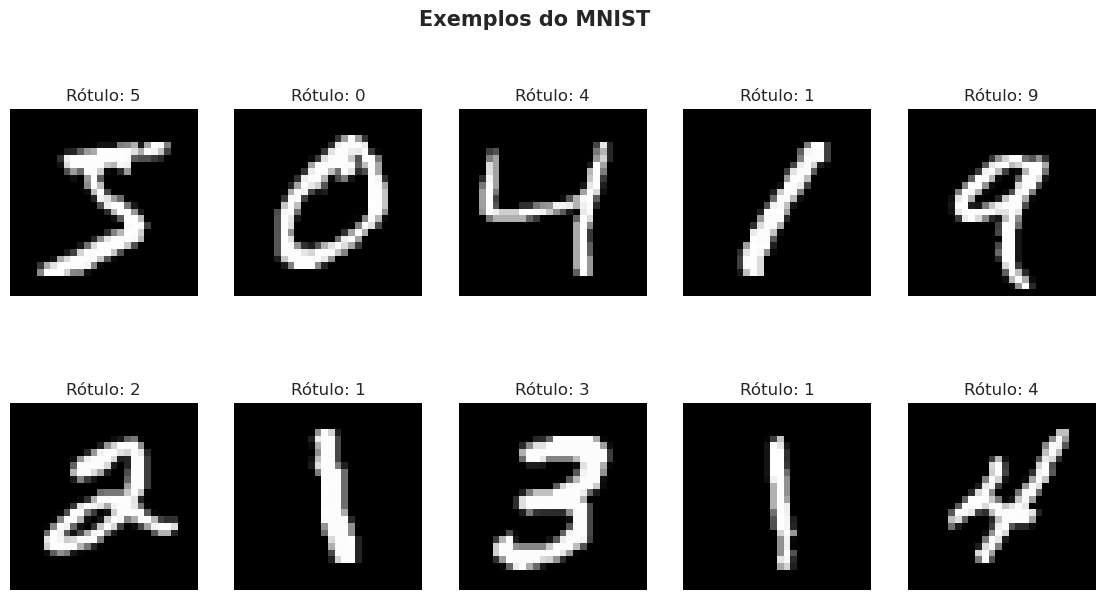

In [14]:
# Carregar o dataset MNIST
(X_treino, y_treino), (X_teste, y_teste) = keras.datasets.mnist.load_data()

# Normalizar os pixels (0-255 → 0-1) e converter para float32
X_treino = X_treino.astype(np.float32) / 255.
X_teste = X_teste.astype(np.float32) / 255.

# Separar treino e validação (55.000 para treino, 5.000 para validação)
X_treino, X_validacao = X_treino[:-5000], X_treino[-5000:]
y_treino, y_validacao = y_treino[:-5000], y_treino[-5000:]

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do treino: {X_treino.shape}, {y_treino.shape}")
print(f"Tamanho da validação: {X_validacao.shape}, {y_validacao.shape}")
print(f"Tamanho do teste: {X_teste.shape}, {y_teste.shape}")

# Plotar exemplos do dataset
plot, i = plt.subplots(2, 5, figsize=(14, 7))
plot.suptitle("Exemplos do MNIST", fontsize=15, fontweight='bold')

for i, ax in enumerate(i.flat):
    ax.imshow(X_treino[i], cmap="gray")
    ax.set_title(f"Rótulo: {y_treino[i]}")
    ax.axis("off")

## **Redes convolucionais**

### Definição

As redes convolucionais (CNN) são uma classe de redes neurais especialmente eficazes para o processamento de dados estruturados, como imagens, séries temporais e outros. Elas utilizam operações de convolução para extrair características locais dos dados, reduzindo o número de parâmetros e melhorando a generalização.

### Campos Receptivos Locais

- O cérebro não analisa a imagem de forma global; ao invés disso, células específicas se concentram em regiões específicas, formando os chamados *campos receptivos locais*.
- Essa abordagem é a base das **Redes Convolucionais (CNN)**.

### Comparação com Redes MLP

- Ao contrário das redes MLP, as CNNs utilizam campos receptivos locais, e não globais.
- Há replicação dos neurônios em um mesmo filtro.
- Isso resulta em uma significativa redução do número de parâmetros livres.

### Convolução

A operação de convolução pode ser definida como:

$$
f_{og}(x) = \sum_{k=-M}^{M} f(x-k) \, g(k)
$$

- Em redes convolucionais, a convolução pode ser aplicada a múltiplos canais.

### Camada de Pooling

- A camada de *Pooling* reduz o mapa de características gerado pela camada convolucional.
- Diminui o custo computacional do modelo.
- Introduz invariância à translação, melhorando a robustez do modelo.

### Stride e Padding

- **Stride**: deslocamento da janela durante a aplicação da convolução (por exemplo, *stride* = 1).
- **Padding**: preenchimento das bordas da imagem para controlar o tamanho do mapa de características resultante.
  - Pode ser definido como 0 (sem preenchimento), por replicação, com um valor constante ou de forma circular.

### Aplicações das CNN

- **Visão Computacional**:
  - Classificação de imagens.
  - Reconhecimento e localização de objetos.
  - Segmentação, entre outras tarefas.
- **Séries Temporais**:
  - Convolução 1D para processamento de sequências numéricas.
- **Processamento de Textos e Áudio**:
  - Aplicações em processamento de linguagem natural e análise de sinais de áudio.


## Implementação

A biblioteca utilizada para implementar as redes CNN neste projeto será o `TensorFlow (https://www.tensorflow.org)`, um framework amplamente utilizado para aprendizado profundo.

### LeNet

A LeNet é uma rede convolucional clássica projetada para reconhecimento de dígitos no MNIST. Ela utiliza duas camadas convolucionais com ativação ReLU e pooling médio para extrair características, seguidas por camadas densas que realizam a classificação. Essa arquitetura simples captura padrões locais essenciais de imagens 28x28 em escala de cinza. A camada final usa softmax para gerar probabilidades para 10 classes. O modelo demonstra eficiência e baixa complexidade para tarefas de classificação.


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def construir_lenet(formato_entrada=(28,28,1), num_classes=10):
    modelo = Sequential()
    # Primeira camada convolucional: 6 filtros, kernel 5x5, ativação ReLU
    modelo.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=formato_entrada))
    # Primeira camada de pooling: pooling médio 2x2
    modelo.add(AveragePooling2D(pool_size=(2,2)))
    # Segunda camada convolucional: 16 filtros, kernel 5x5, ativação ReLU
    modelo.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
    # Segunda camada de pooling: pooling médio 2x2
    modelo.add(AveragePooling2D(pool_size=(2,2)))
    # Achatar os mapas de características para as camadas densas
    modelo.add(Flatten())
    # Camadas totalmente conectadas (densas)
    modelo.add(Dense(120, activation='relu'))
    modelo.add(Dense(84, activation='relu'))
    # Camada de saída com ativação softmax para classificação em 10 classes
    modelo.add(Dense(num_classes, activation='softmax'))
    return modelo

# Criação do modelo LeNet
modelo_lenet = construir_lenet(formato_entrada=(28,28,1), num_classes=10)
modelo_lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/gui/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Visualização da LeNet

O TensorFlow permite visualizar a arquitetura do LeNet utilizando a função `plot_model`. Isso facilita a compreensão da estrutura da rede, mostrando como as camadas processam as sequências de entrada e como a camada totalmente conectada realiza a classificação. Com o parâmetro `show_shapes=True`, é possível verificar os tamanhos dos tensores em cada camada, garantindo que as dimensões estejam corretas, o que é essencial para o bom funcionamento do modelo durante o treinamento.

(-0.5, 1449.5, 2588.5, -0.5)

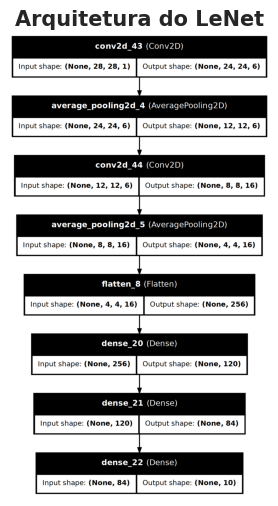

In [16]:
from keras.utils import plot_model

# Gera o diagrams do modelo
plot_model(modelo_lenet, to_file="./imgs/lenet.png", show_shapes=True, show_layer_names=True)

img_lenet = plt.imread("./imgs/lenet.png")

# Plotar a arquitetura do modelo
plt.figure(figsize=(10, 6))
plt.imshow(img_lenet)
plt.title("Arquitetura do LeNet", fontsize=15, fontweight='bold')
plt.axis("off")

### Treinamento da LeNet

In [11]:
historico_lenet = modelo_lenet.fit(X_treino, y_treino, epochs=20, batch_size=32, validation_data=(X_validacao, y_validacao))

Epoch 1/20


I0000 00:00:1738849767.008048   10343 service.cc:146] XLA service 0x7c90e8006730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738849767.008080   10343 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-02-06 10:49:27.069609: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-06 10:49:27.299936: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


  68/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3603 - loss: 1.9475

I0000 00:00:1738849770.138047   10343 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8434 - loss: 0.5058 - val_accuracy: 0.9786 - val_loss: 0.0832
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0903 - val_accuracy: 0.9818 - val_loss: 0.0620
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0617 - val_accuracy: 0.9846 - val_loss: 0.0572
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0489 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0380 - val_accuracy: 0.9838 - val_loss: 0.0537
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9860 - val_loss: 0.0485
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9896 - val_loss: 0.0363
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accura

### Acurácia do LeNet

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9869 - loss: 0.0604
Acurácia no conjunto de teste: 0.9897


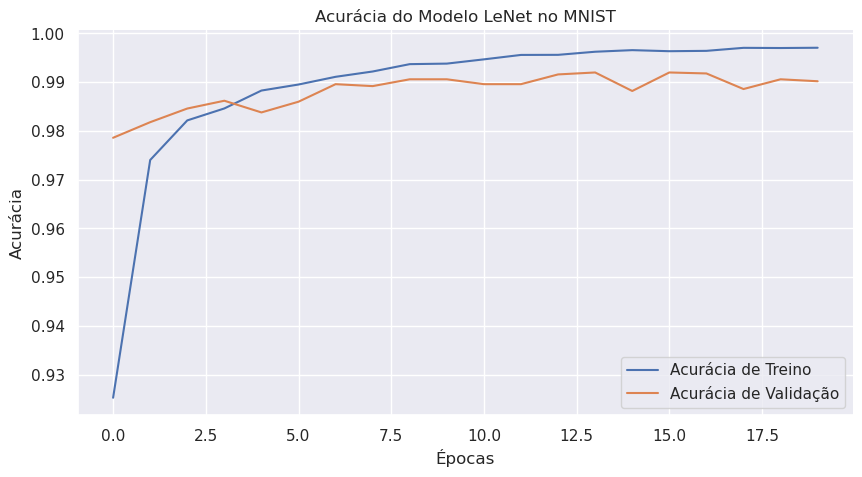

In [14]:
# Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_lenet.evaluate(X_teste, y_teste)
print(f"Acurácia no conjunto de teste: {acuracia:.4f}")

# Plotar o gráfico de acurácia (treino e validação)
plt.figure(figsize=(10, 5))
plt.plot(historico_lenet.history['accuracy'], label='Acurácia de Treino')
plt.plot(historico_lenet.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Acurácia do Modelo LeNet no MNIST")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

### AlexNet

A AlexNet é uma rede convolucional profunda com 8 camadas treináveis, sendo 5 convolucionais e 3 totalmente conectadas. Possui cerca de 60 milhões de parâmetros e 650 mil neurônios, utilizando ReLU como ativação e dropout para evitar overfitting. A arquitetura inclui camadas de pooling para redução da dimensionalidade e normalização local para estabilizar o treinamento.

In [5]:
from keras.layers import BatchNormalization, MaxPooling2D, Dropout

def alexnet(formato_entrada=(28,28,1), num_classes=10):
    modelo = Sequential()
    # Primeira camada convolucional adaptada: 32 filtros, kernel 3x3, stride 1, padding 'same'
    modelo.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=formato_entrada, padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # Segunda camada convolucional: 64 filtros, kernel 3x3, padding 'same'
    modelo.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # Terceira camada convolucional: 128 filtros, kernel 3x3, padding 'same'
    modelo.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # Achatar para camadas densas
    modelo.add(Flatten())
    
    # Camada densa 1 com 256 neurônios e Dropout
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.5))
    
    # Camada densa 2 com 128 neurônios e Dropout
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.5))
    
    # Camada de saída com softmax para classificação em 10 classes
    modelo.add(Dense(num_classes, activation='softmax'))
    
    return modelo

# Criar e compilar o modelo AlexNet 
modelo_alexnet = alexnet(formato_entrada=(28,28,1), num_classes=10)
modelo_alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Visualização da AlexNet

(-0.5, 1505.5, 4921.5, -0.5)

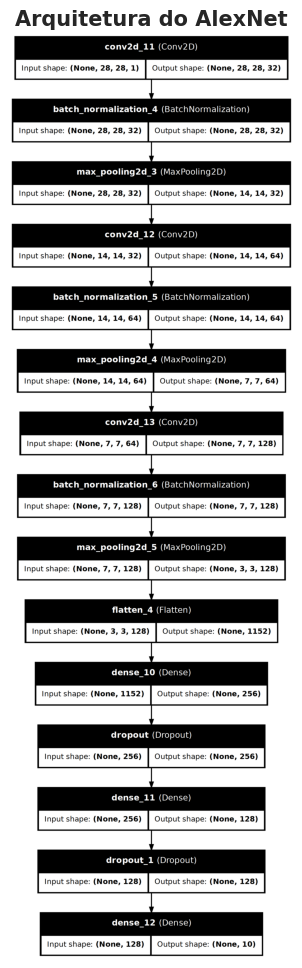

In [21]:
# Gera o diagrams do modelo
plot_model(modelo_alexnet, to_file="./imgs/alexnet.png", show_shapes=True, show_layer_names=True)

img_alexnet = plt.imread("./imgs/alexnet.png")

# Plotar a arquitetura do modelo
plt.figure(figsize=(18, 12))
plt.imshow(img_alexnet)
plt.title("Arquitetura do AlexNet", fontsize=15, fontweight='bold')
plt.axis("off")

### Treinamento da AlexNet

In [23]:
historico_alexnet = modelo_alexnet.fit(X_treino, y_treino, epochs=20, batch_size=32, validation_data=(X_validacao, y_validacao))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7966 - loss: 0.6597 - val_accuracy: 0.9894 - val_loss: 0.0461
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9708 - loss: 0.1165 - val_accuracy: 0.9886 - val_loss: 0.0435
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9807 - loss: 0.0767 - val_accuracy: 0.9914 - val_loss: 0.0356
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9842 - loss: 0.0640 - val_accuracy: 0.9906 - val_loss: 0.0384
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0525 - val_accuracy: 0.9934 - val_loss: 0.0324
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9870 - loss: 0.0534 - val_accuracy: 0.9918 - val_loss: 0.0414
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9885 - loss: 0.0473 - val_accuracy: 0.9924 - val_loss: 0.0362
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9902 - loss: 0.0410 

### Acurácia da AlexNet

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0498
Acurácia no conjunto de teste: 0.9937


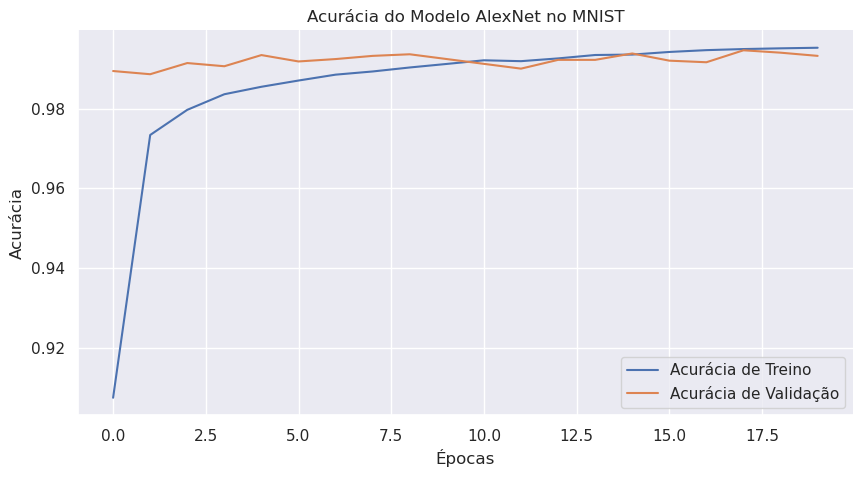

In [25]:
# Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_alexnet.evaluate(X_teste, y_teste)
print(f"Acurácia no conjunto de teste: {acuracia:.4f}")

# Plotar o gráfico de acurácia (treino e validação)
plt.figure(figsize=(10, 5))
plt.plot(historico_alexnet.history['accuracy'], label='Acurácia de Treino')
plt.plot(historico_alexnet.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Acurácia do Modelo AlexNet no MNIST")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

### VGG (*Visual Geometry Group*)

A VGG (Visual Geometry Group) é uma rede convolucional profunda caracterizada pelo uso de camadas convolucionais empilhadas com filtros pequenos (3×3) e camadas de pooling (2×2) para redução da dimensionalidade. A arquitetura segue um padrão simples, aumentando progressivamente a profundidade da rede enquanto reduz a dimensão espacial das features. Utiliza ReLU como ativação e camadas totalmente conectadas no final para classificação. 

In [26]:
def vgg(formato_entrada=(28,28,1), num_classes=10):
    modelo = Sequential()
    
    # Bloco 1: 2 Camadas Conv + MaxPooling
    modelo.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=formato_entrada))
    modelo.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Bloco 2: 2 Camadas Conv + MaxPooling
    modelo.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Bloco 3: 3 Camadas Conv + MaxPooling
    modelo.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Achatar para camadas densas
    modelo.add(Flatten())

    # Camadas densas com Dropout
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))

    # Camada de saída com softmax
    modelo.add(Dense(num_classes, activation='softmax'))

    return modelo

# Criar e compilar o modelo VGG 
modelo_vgg = vgg(formato_entrada=(28,28,1), num_classes=10)
modelo_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/gui/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Visualização da VGG

(-0.5, 1560.5, 5255.5, -0.5)

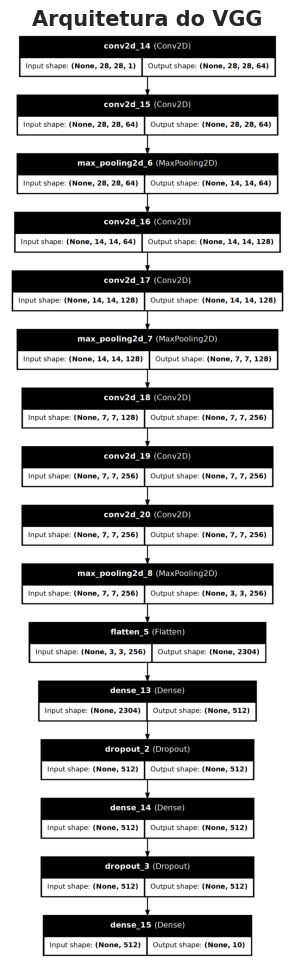

In [27]:
# Gera o diagrams do modelo
plot_model(modelo_vgg, to_file="./imgs/vgg.png", show_shapes=True, show_layer_names=True)

img_vgg = plt.imread("./imgs/vgg.png")

# Plotar a arquitetura do modelo
plt.figure(figsize=(18, 12))
plt.imshow(img_vgg)
plt.title("Arquitetura do VGG", fontsize=15, fontweight='bold')
plt.axis("off")

### Treinamento da VGG

In [28]:
historico_vgg = modelo_vgg.fit(X_treino, y_treino, epochs=20, batch_size=32, validation_data=(X_validacao, y_validacao))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.7799 - loss: 0.6237 - val_accuracy: 0.9878 - val_loss: 0.0422
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9799 - loss: 0.0792 - val_accuracy: 0.9902 - val_loss: 0.0344
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9832 - loss: 0.0634 - val_accuracy: 0.9874 - val_loss: 0.0675
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9874 - loss: 0.0522 - val_accuracy: 0.9866 - val_loss: 0.0658
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9886 - loss: 0.0436 - val_accuracy: 0.9878 - val_loss: 0.0549
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9914 - loss: 0.0367 - val_accuracy: 0.9906 - val_loss: 0.0395
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9905 - loss: 0.0379 - val_accuracy: 0.9908 - val_loss: 0.0466
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.9910 -

### Acurácia da VGG

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9886 - loss: 0.0561
Acurácia no conjunto de teste: 0.9908


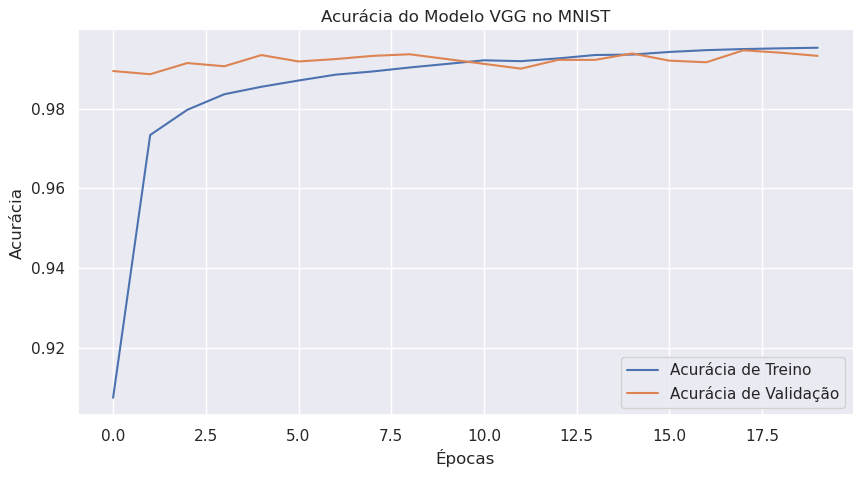

In [29]:
# Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_vgg.evaluate(X_teste, y_teste)
print(f"Acurácia no conjunto de teste: {acuracia:.4f}")

# Plotar o gráfico de acurácia (treino e validação)
plt.figure(figsize=(10, 5))
plt.plot(historico_alexnet.history['accuracy'], label='Acurácia de Treino')
plt.plot(historico_alexnet.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Acurácia do Modelo VGG no MNIST")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

### GoogleNet

A GoogLeNet é uma arquitetura de rede neural profunda que utiliza módulos chamados "Inception". Cada módulo combina várias operações convolucionais com diferentes tamanhos de kernel (1x1, 3x3, 5x5), além de pooling, permitindo que a rede capture informações em diferentes escalas. A GoogLeNet introduziu o uso de convoluções 1x1 para reduzir a dimensionalidade e melhorar a eficiência computacional, tornando-se mais profunda e leve. Ela também utiliza um conceito de "auxiliary classifiers" para ajudar no treinamento.

In [11]:
def googlenet(formato_entrada=(28,28,1), num_classes=10):
    modelo = Sequential()

    # Primeira camada convolucional: 32 filtros, kernel 3x3, stride 1, padding 'same'
    modelo.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=formato_entrada, padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Bloco Inception 1
    inception_1_1x1 = Conv2D(64, (1,1), activation='relu', padding='same')
    inception_1_3x3 = Conv2D(64, (3,3), activation='relu', padding='same')
    inception_1_5x5 = Conv2D(64, (5,5), activation='relu', padding='same')
    inception_1_pool = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')

    # Aplicando Inception 1
    modelo.add(Conv2D(64, (1,1), activation='relu', padding='same'))
    modelo.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    modelo.add(Conv2D(128, (1,1), activation='relu', padding='same'))

    # Bloco de pooling final e linearização
    modelo.add(Flatten())

    # Camadas densas
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))

    # Camada de saída com softmax
    modelo.add(Dense(num_classes, activation='softmax'))

    return modelo

# Criar e compilar o modelo GoogLeNet 
modelo_googlenet = googlenet(formato_entrada=(28,28,1), num_classes=10)
modelo_googlenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Visualização da GoogleNet

(-0.5, 1532.5, 3921.5, -0.5)

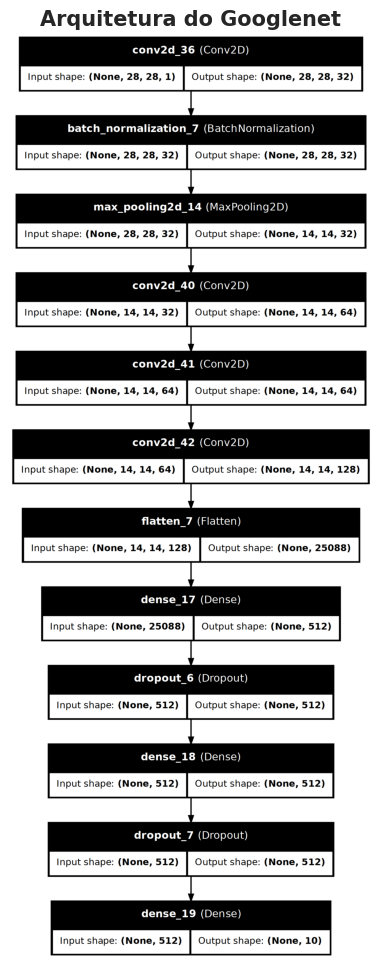

In [18]:
# Gera o diagrams do modelo
plot_model(modelo_googlenet, to_file="./imgs/googlenet.png", show_shapes=True, show_layer_names=True)

img_googlenet = plt.imread("./imgs/googlenet.png")

# Plotar a arquitetura do modelo
plt.figure(figsize=(18, 12))
plt.imshow(img_googlenet)
plt.title("Arquitetura do Googlenet", fontsize=15, fontweight='bold')
plt.axis("off")

### Treinamento da GoogleNet

In [19]:
historico_googlenet = modelo_googlenet.fit(X_treino, y_treino, epochs=20, batch_size=32, validation_data=(X_validacao, y_validacao))

Epoch 1/20


I0000 00:00:1738854990.967627   22484 service.cc:146] XLA service 0x7bbbdc010770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738854990.967648   22484 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-02-06 12:16:30.999160: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-06 12:16:31.161756: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


  10/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.1225 - loss: 3.0253

I0000 00:00:1738854994.483154   22484 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.8611 - loss: 0.4427 - val_accuracy: 0.9858 - val_loss: 0.0494
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9782 - loss: 0.0766 - val_accuracy: 0.9890 - val_loss: 0.0398
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9848 - loss: 0.0545 - val_accuracy: 0.9864 - val_loss: 0.0499
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9874 - loss: 0.0446 - val_accuracy: 0.9920 - val_loss: 0.0330
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9938 - val_loss: 0.0300
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9919 - loss: 0.0297 - val_accuracy: 0.9916 - val_loss: 0.0311
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9923 - loss: 0.0277 - val_accuracy: 0.9922 - val_loss: 0.0306
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9932 - loss: 0.02

### Acurácia da Googlenet

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0573
Acurácia no conjunto de teste: 0.9901


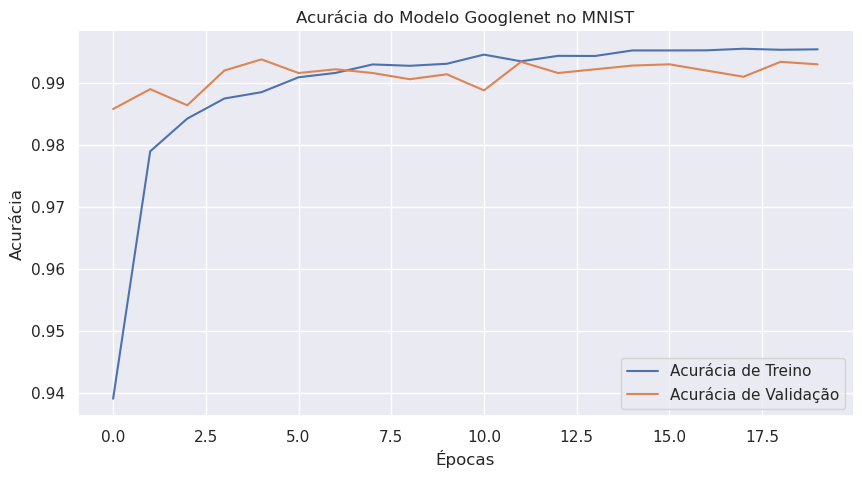

In [20]:
# Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_googlenet.evaluate(X_teste, y_teste)
print(f"Acurácia no conjunto de teste: {acuracia:.4f}")

# Plotar o gráfico de acurácia (treino e validação)
plt.figure(figsize=(10, 5))
plt.plot(historico_googlenet.history['accuracy'], label='Acurácia de Treino')
plt.plot(historico_googlenet.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Acurácia do Modelo Googlenet no MNIST")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

## ResNet (*Residual Neural Network*)